In [1]:
# Adjust the Python path so that modules in the parent folder are accessible.
import sys, os
import pandas as pd
sys.path.insert(0, os.path.abspath(".."))

# Import your custom modules
from hedging import delta_hedging, utility_based_hedging

In [2]:
# Enable inline plotting and LaTeX-style formatting
%matplotlib inline
import matplotlib.pyplot as plt

# Configure matplotlib to use LaTeX for text rendering.
plt.rcParams.update({
    "text.usetex": True,               # Use LaTeX for all text
    "font.family": "serif",            # Use a serif font family
    "font.serif": ["Computer Modern Roman"],  # The default LaTeX font
    "axes.labelsize": 12,              # Axis label font size
    "font.size": 12,                   # General font size
    "legend.fontsize": 12,             # Legend font size
    "xtick.labelsize": 10,             # X-tick label size
    "ytick.labelsize": 10              # Y-tick label size
})

In [3]:
# Simulation parameters
S0 = 100                   # Initial stock price
K = 100                    # Strike price of the option
T = 1                      # Time to expiration (years)
sigma = 0.2                # Static volatility (20%)
r = 0.05                   # Risk-free rate (5%)
q = 0.0                    # Dividend yield
dt = 1/252                 # Daily time step (252 trading days/year)
n_periods = 252            # Total number of periods (1 year)
hedging_frequency = 1      # Rebalance every period (daily hedging)
option_type = "put"        # Option type ("put" or "call")
transaction_cost_static = 0.01  # Fixed transaction cost (0.1%)
random_state = 5

In [4]:
delta_results = delta_hedging(
    S0=S0,
    K=K,
    T=T,
    sigma=sigma,
    r=r,
    dt=dt,
    n_periods=n_periods,
    hedging_frequency=hedging_frequency,
    option_type=option_type,
    q=q,
    transaction_cost=transaction_cost_static,
    random_state=random_state,
    dynamic_vol=False,         
    dynamic_trans_cost=False,  
    stock_prices=None          
)

In [5]:
utility_results = utility_based_hedging(
    S0=S0,
    K=K,
    T=T,
    sigma=sigma,
    r=r,
    dt=dt,
    n_periods=n_periods,
    hedging_frequency=hedging_frequency,
    option_type=option_type,
    q=q,
    transaction_cost=transaction_cost_static,
    risk_aversion=1.0,         # Example risk aversion parameter
    no_trade_multiplier=0.2,   # Scale for the no-trade region half-width
    random_state=random_state,
    dynamic_vol=False,         # Static volatility
    dynamic_trans_cost=False,  # Fixed transaction cost
    stock_prices=None
)

In [6]:
# Print Key Outputs
print("Delta Hedging Strategy:")
print("  Final PnL: ${:.2f}".format(delta_results["total_pnl"]))
print("  Total Transaction Costs: ${:.4f}".format(delta_results["transaction_costs"]))
print("  Last Stock Price: ${:.2f}".format(delta_results["stock_prices"].iloc[-1]))

print("\nUtility-Based Hedging Strategy:")
print("  Final PnL: ${:.2f}".format(utility_results["total_pnl"]))
print("  Total Transaction Costs: ${:.4f}".format(utility_results["transaction_costs"]))
print("  Last Stock Price: ${:.2f}".format(utility_results["stock_prices"].iloc[-1]))


Delta Hedging Strategy:
  Final PnL: $7.34
  Total Transaction Costs: $3.9521
  Last Stock Price: $103.31

Utility-Based Hedging Strategy:
  Final PnL: $-0.74
  Total Transaction Costs: $1.0829
  Last Stock Price: $103.31


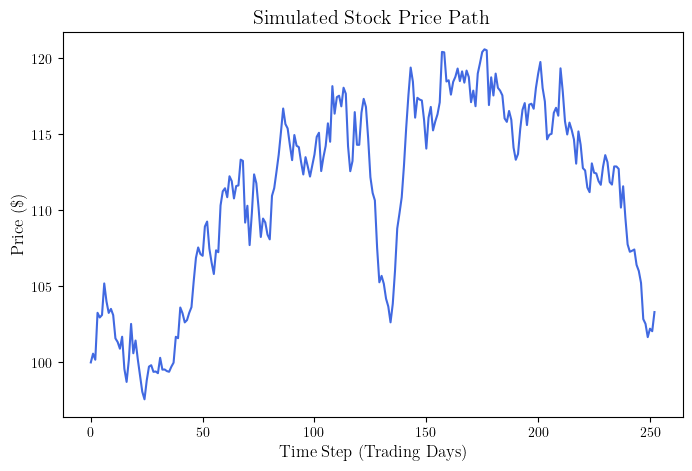

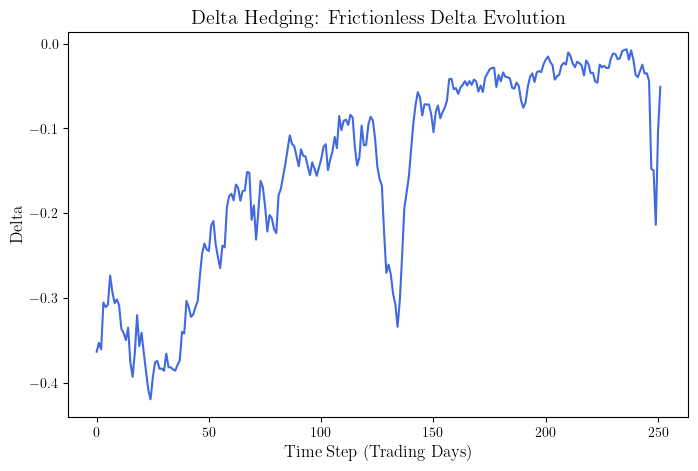

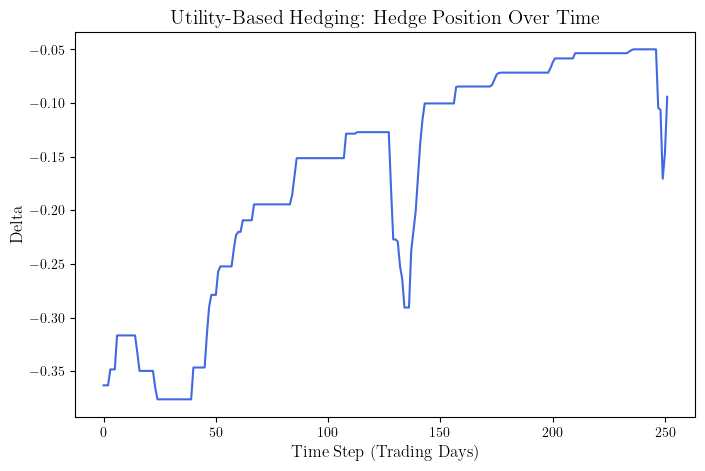

In [ ]:
# Plot Results

# Plot simulated stock price path
plt.figure(figsize=(8, 5))
plt.plot(delta_results["stock_prices"], label="Stock Price", color='royalblue')
plt.xlabel("Time Step (Trading Days)")
plt.ylabel("Price (\$)")
plt.title("Simulated Stock Price Path")
# plt.savefig("theoretical_price.png", dpi=300, bbox_inches="tight")
plt.show()

# Plot frictionless delta evolution from delta hedging
plt.figure(figsize=(8, 5))
plt.plot(delta_results["delta_values"][:-1], label="Frictionless Delta (Delta Hedging)", color='royalblue')
plt.xlabel("Time Step (Trading Days)")
plt.ylabel("Delta")
plt.title("Delta Hedging: Frictionless Delta Evolution")
# plt.savefig("theoretical_delta.png", dpi=300, bbox_inches="tight")
plt.show()

# Plot hedge positions from utility-based hedging
plt.figure(figsize=(8, 5))
plt.plot(utility_results["hedge_positions"][:-1], label="Hedge Position (Utility-Based)", color='royalblue')
plt.xlabel("Time Step (Trading Days)")
plt.ylabel("Delta")
plt.title("Utility-Based Hedging: Hedge Position Over Time")
# plt.savefig("theoretical_utility.png", dpi=300, bbox_inches="tight")
plt.show()

In [8]:
i = 0.1
array = pd.DataFrame(columns=["no_trade_multiplier", "transaction_costs"])
while i < 3.1:
   
   utility_results_2 = utility_based_hedging(
    S0=S0,
    K=K,
    T=T,
    sigma=sigma,
    r=r,
    dt=dt,
    n_periods=n_periods,
    hedging_frequency=hedging_frequency,
    option_type=option_type,
    q=q,
    transaction_cost=transaction_cost_static,
    risk_aversion=1.0,         # Example risk aversion parameter
    no_trade_multiplier=i,   # Scale for the no-trade region half-width
    random_state=random_state,
    dynamic_vol=False,         # Static volatility
    dynamic_trans_cost=False,  # Fixed transaction cost
    stock_prices=None
    )
   
   array.loc[len(array)] = [i, utility_results_2["transaction_costs"]]

   i += 0.1




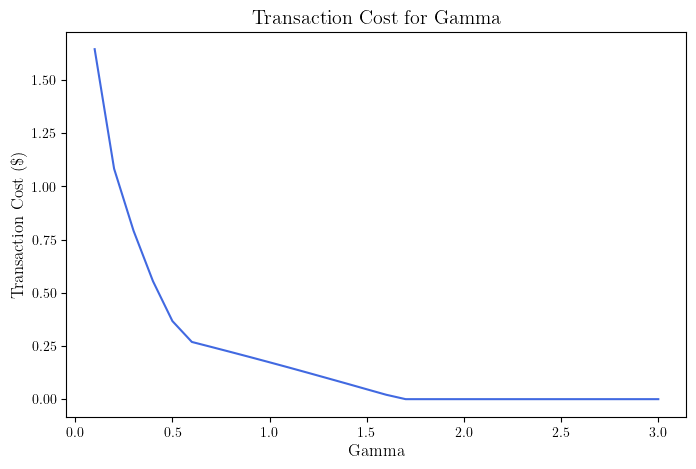

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(array["no_trade_multiplier"], array["transaction_costs"], linestyle='-', color='royalblue')
plt.xlabel('Gamma')
plt.ylabel('Transaction Cost (\$)')
plt.title("Transaction Cost for Gamma")
# plt.savefig("theoretical_gamma.png", dpi=300, bbox_inches="tight")
plt.show()